In [60]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pickle
import colorama 
from colorama import Fore, Style, Back
import random

In [94]:
with open('intents.json') as file:
    data = json.load(file)
    
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)
print(len(training_sentences))

309


In [58]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
print(training_labels)

['greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'morning', 'morning', 'afternoon', 'afternoon', 'evening', 'evening', 'night', 'night', 'night', 'night', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'thanks', 'thanks', 'thanks', 'thanks', 'thanks', 'no-response', 'neutral-response', 'neutral-response', 'neutral-response', 'neutral-response', 'neutral-response', 'neutral-response', 'neutral-response', 'neutral-response', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'skill', 'skill', 'creation', 'creation', 'creation', 'name', 'name', 'name', 'help', 'help', 'help', 'help', 'help', 'help', 'help', 'help', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'stressed', 'stressed', 'stressed', 'stressed', 'stressed', 'worthless', 'worthless', 'worthless', 'worthless', 'wo

In [98]:
import nlpaug.augmenter.word as naw

# List of training sentences
sentences = ['I like cats', 'The dog barked', 'She ate the cake']

# Initialize augmentation object
aug = naw.SynonymAug(aug_src='wordnet')

# Augment sentences
aug_sentences = []
for sentence in training_sentences:
    aug_sentence = aug.augment(sentence)
    aug_sentences.append(aug_sentence)
    
# Print augmented sentences
#print(aug_sentences)
#print(training_labels)

#expand the training sentences and the labels to enlarge the dataset
training_sentences.extend(aug_sentences)
training_labels.extend(training_labels)

print(len(training_sentences))
print(len(training_labels))

4944
4944


In [99]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [100]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

##CHATGPT MODEL

In [101]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, Concatenate, Dot, Activation, Flatten, TimeDistributed, GRU
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [104]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Bidirectional(GRU(16, recurrent_dropout=0.2,return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(16, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['CategoricalAccuracy'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 20, 16)            16000     
                                                                 
 bidirectional_33 (Bidirecti  (None, 20, 32)           3264      
 onal)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 20, 32)            0         
                                                                 
 bidirectional_34 (Bidirecti  (None, 20, 32)           4800      
 onal)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 20, 32)            0         
                                                                 
 dense_25 (Dense)            (None, 20, 16)          

In [22]:
from keras.utils import to_categorical

one_hot_labels = to_categorical(training_labels, num_classes)
#print(one_hot_labels.shape)
print(training_labels)

ValueError: ignored

In [105]:
epochs = 200
history = model.fit(padded_sequences, training_labels, epochs=epochs, verbose=1, validation_split=0.1)

Epoch 1/200
140/140 [==============================] - 13s 35ms/step - loss: 4.3947 - categorical_accuracy: 0.0205 - val_loss: 4.3777 - val_categorical_accuracy: 0.0000e+00
Epoch 2/200
140/140 [==============================] - 4s 26ms/step - loss: 4.2666 - categorical_accuracy: 0.0000e+00 - val_loss: 4.3278 - val_categorical_accuracy: 0.0000e+00
Epoch 3/200
140/140 [==============================] - 4s 26ms/step - loss: 4.2110 - categorical_accuracy: 0.0000e+00 - val_loss: 4.2707 - val_categorical_accuracy: 0.0000e+00
Epoch 4/200
140/140 [==============================] - 4s 26ms/step - loss: 4.0763 - categorical_accuracy: 2.2477e-04 - val_loss: 4.1222 - val_categorical_accuracy: 0.0000e+00
Epoch 5/200
140/140 [==============================] - 4s 26ms/step - loss: 3.9003 - categorical_accuracy: 0.0061 - val_loss: 4.0730 - val_categorical_accuracy: 0.0667
Epoch 6/200
140/140 [==============================] - 4s 27ms/step - loss: 3.8353 - categorical_accuracy: 0.0139 - val_loss: 3.935

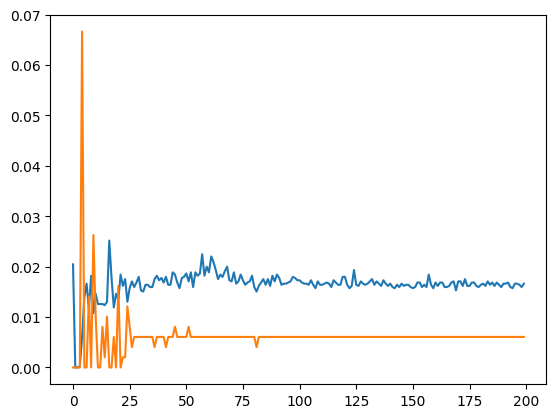

In [106]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])

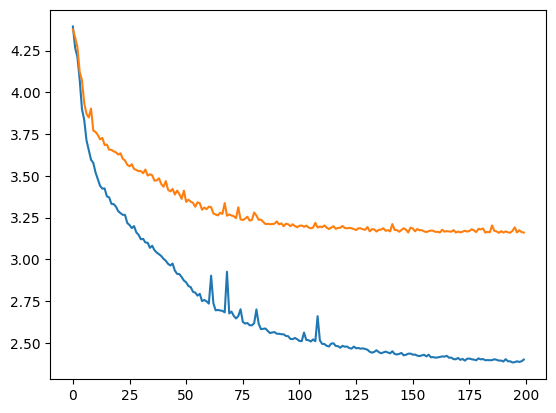

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [56]:
# to save the trained model
model.save("chat_model")

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

In [57]:
with open("intents.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        #print(result)                                    
        tag = lbl_encoder.inverse_transform([np.argmax(result)])
        print(tag)
        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: Hello
1/1 [==============================] - 1s 1s/step
['greeting']
ChatBot: Great to see you. How do you feel currently?
User: I'm feeling sad right now
1/1 [==============================] - 0s 27ms/step
['suicide']
ChatBot: I'm very sorry to hear that but you have so much to look forward to. Please seek help by contacting: 988.
User: I don't think it's that extreme, but yeah go off
1/1 [==============================] - 0s 29ms/step
['learn-more']
ChatBot: So first I would suggest you to give yourself a break. Thinking more and more about the problem definitely does not help in solving it. You'll just end up overwhelming yourself.
User: I am sad
1/1 [==============================] - 0s 26ms/step
['sad']
ChatBot: I'm sorry to hear that. I'm here for you. Talking about it might help. So, tell me why do you think you're feeling this way?
User: I feel very depressed
1/1 [==============================] - 0s 27ms/step
['stressed']